In [1]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as N
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree


In [8]:
nclu=NetCDFFile('fw_frac_max_rcp45.nc','r')
fw_hist_tmp = nclu.variables['FW'][:]
#latnc = nclu.variables['Lat'][:]
latnc = nclu.variables['latitude'][:]
# znc = nclu.variables['level'][:]
#lonnc = nclu.variables['Lon'][:]
lonnc = nclu.variables['longitude'][:]
# timenc = nclu.variables['time'][:]

fw_hist = fw_hist_tmp[0,:,:]
nonwet_hist = 1 - fw_hist

fw_hist[fw_hist<=0] = -1.0

# Mask out outside the permafrost region.
ncmk=NetCDFFile('surfdata_05x05.nc','r')
ncvar_mask = ncmk.variables['MASK_CRU_NCEP'][:]

fw_hist[ncvar_mask<1] = ma.masked
nonwet_hist[ncvar_mask<1] = ma.masked

(1, 360, 720)

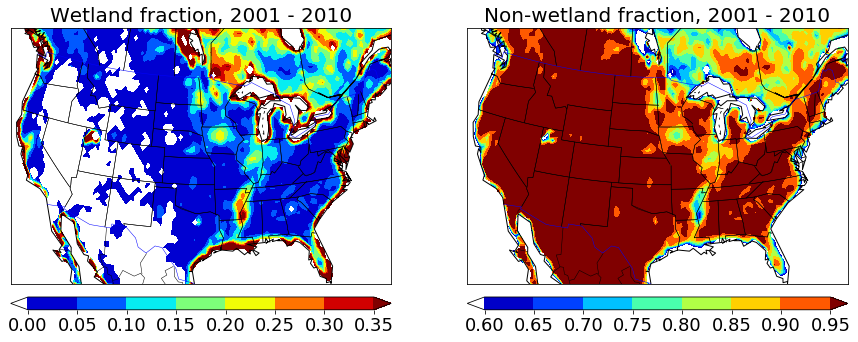

In [9]:
#http://matplotlib.org/basemap/users/mapsetup.html

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(121)
ax1.set_title("Wetland fraction, 2001 - 2010",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = N.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
# clevs = N.arange(0,7,0.5)
clevs = clevs = N.arange(0,0.4,0.05)

fw_hist[:,:] = ma.masked_where(fw_hist[:,:]<0, fw_hist[:,:])
mdata = maskoceans(lon, lat, fw_hist[:,:])

cs1 = map.contourf(x,y,fw_hist[:,:],clevs,cmap=plt.cm.jet,vmin=0,vmax=0.35,extend='both')
cbar = map.colorbar(cs1,location='bottom',pad="5%")
cbar.ax.tick_params(labelsize=18) 
cs1.cmap.set_under('white')

ax2 = fig.add_subplot(122)
ax2.set_title("Non-wetland fraction, 2001 - 2010",fontsize=20)
map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
clevs = N.arange(0.6,1.0,0.05)
cs = map.contourf(x,y,nonwet_hist[:,:],clevs,cmap=plt.cm.jet,vmin=0.6,vmax=1.0,extend='both')
#cs.cmap.set_under('white')
#cs.cmap.set_over('cyan')

cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.ax.tick_params(labelsize=18) 

#plt.show()
plt.savefig('RCP45_SWAMPS.png',dpi=300)